# Lesson 3.01 Linear Regression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Part I: Simple Linear Regression

When you have 1 predictor variable you are doing _simple linear regression_. 

## The Data
Data source: [here](https://www.rdocumentation.org/packages/fpp2/versions/2.3/topics/elecdemand)

The data consist of electricity demand for Victoria, Australia every half-hour in 2014. We have three columns:

* Total electricity demand (in gigawatts)
* Whether or not it is a workday (0/1)
* Temperature (Celcius)

In [2]:
elec = pd.read_csv("../data/elecdemand.csv")

# We'll limit our focus to only days in which it was
# at least 15 degrees Celcius (59 F)
elec = elec[elec["temp"] > 15]

print(elec.shape)
elec.head()

(9807, 3)


,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


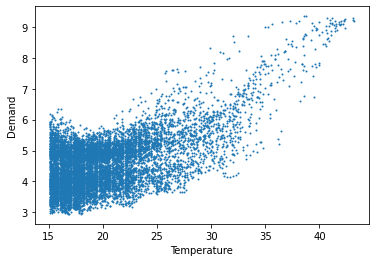

In [3]:
# Plot temperature vs. demand
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.xlabel('Temperature')
plt.ylabel('Demand');

## The Null model

**Q: If we had to guess the electricity demand for any new temperature what would you pick?** <br/>
A: We don't have much information yet, so probably just the mean!

In [4]:
elec['demand'].mean()

4.624524730836953

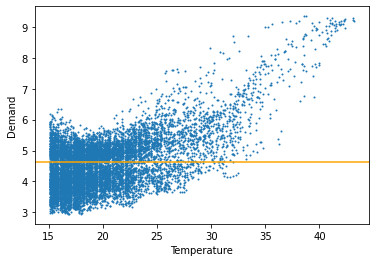

In [5]:
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.axhline(elec['demand'].mean(), color = 'orange')
plt.xlabel('Temperature')
plt.ylabel('Demand');

## How could we improve our model?
If we were to draw a straight line that fit the points the best, what would that look like?

<img src="../images/ols.png" align="left" style="height: 350px">

**Based on the chart below, does the new line better fit the data than our old line that was just the mean?**

Looks like it. We'll discuss formal evaluation metrics in a bit.

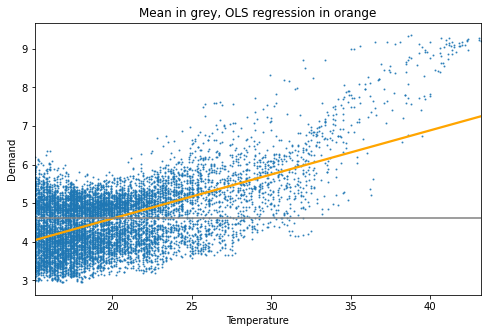

In [6]:
# More info at this link - https://seaborn.pydata.org/generated/seaborn.regplot.html
# ci refers to confidence interval. for large datasets, it may be advisable to avoid that computation by setting this parameter to None.
# _kws in scatter and line refer to keywords. in other words any additional settings to be configured for scatter and line
plt.figure(figsize = (8, 5))
sns.regplot('temp', 'demand', elec, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.axhline(elec['demand'].mean(), color = 'grey')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Mean in grey, OLS regression in orange');

## Lines

This was the equation I learned for a line. Look familiar?
$$ \huge y = mx + b$$
In data science it gets changed to 

$$ \huge  y = \beta_0 + \beta_1 x_1 $$

### Errors

Our model isn't going to be perfect. The things our model doesn't capture are errors and denoted by $\epsilon$ (epsilon).

$$ \huge y = \beta_0 + \beta_1 x_1 + \epsilon $$

### OLS Regression Modeling

We have _x_ and we have _y_. That's our data. 

Our model is trying to figure out the best betas. 

$$ \huge y = \hat \beta_0 + \hat \beta_1 x_1 $$


$\hat \beta_0$ is the y-intercept that our model learns. The point where the line crosses the y-axis.

$\hat \beta_1$ is the coefficient that we multiply by our $x_1$ variable. It's the slope. For every 1 unit it change in $x_1$, y increases by the value of $\beta1$.

$y$ is the ground truth of our target variable. 


$$ \huge \hat y =  \beta_0 +  \beta_1 x_1 $$

When we have a model that has been fit with the data the betas have been computed. We can plug in a new x value and solve for $\hat y$. 

#### $\hat y$ is a prediction! 🎉

---
## OLS regression model in scikit-learn.

### Step 1: Assemble our predictor variables (X) and our target (y) 

 We need an X matrix that is n-by-p.
- n = rows
- p = features

A feature just means a predictor column.

In the simple linear regression case, p = 1. We have one feature ($x_1$). Usually you'll have more than 1 feature. 

In [7]:
# Step 1: Assemble our X and y variables

# We need an X matrix that is n-by-p (in this case, p = 1)
X = elec[["temp"]]

#### Why did we make X a DataFrame?
Scikit-learn expects a two dimensional object. Usually we have more than one predictor variable.

y is the outcome variable

In [8]:
# In this case we use the demand column for Y-values
y = elec["demand"]

In [9]:
# check the size of the Y data structure
y.shape

(9807,)

#### Why is the target a Series or 1D numpy array? 

Scikit-learn supervised learning estimators are expecting a single output column. They predict one value for each observation, generally.

### Step 2: Instantiate the model

In [10]:
# Step 2: Instantiate the model
lr = LinearRegression()

### Step 3: Fit the model

In [11]:
# Step 3: Fit the model
lr.fit(X, y)

LinearRegression()

### Step 4: Check out and interpret our model weights

In [12]:
# Take a peek at the model coefficient and intercept
print(lr.intercept_)
print(lr.coef_)

2.3187629782673604
[0.11415682]


We now have the following model of reality:

$$\hat{d} = 2.32 + 0.11t$$

#### Interpretation of coefficients

In general, we can interpret our slope as having the following impact:
> For every 1 unit increase in $x_i$, we expect $y$ to increase by $\beta_i$.

<details><summary>How would we interpret the slope for our model?</summary>
For every 1 degree increase in temperature, we would expect 0.11 more gigawatts of electricty to be demanded. 
</details>

#### Interpretation of our y-intercept. Does it make sense?

When it is zero degrees Celsius, we expect 2.32 gigawatts of electricity to be demanded. Ordinarily, this _would_ make sense, however, we have no data near this value and would want to minimise **extrapolation** as much as possible and collect data within the available range of data.

### Step 5: Make predictions

If we had new data points for temperature we could pass it to the predict method to generate price predictions.

We don't have any new data, so let's just see what predictions our model would have made. This is the same as saying "Find the x value for a prediction on the plot and go up to our line. That value for y is our prediction."

We do this for all the x values.

In [13]:
# Make predictions
y_pred = lr.predict(X)

#### Why don't we pass `y`?

We are predicting y.

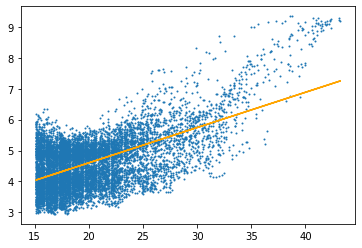

In [14]:
# Visualise the X-values and y-values in the form of a scatter plot
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.plot(elec["temp"], y_pred, color='orange');

### Step 6: Evaluation

We now want to see how good a job our model does at predicting demand. **Mean squared error** is a popular scoring metric. 

Lower is better. That's the case whenever "error" is in the metric name.

$$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum e_i^2 $$

#### MSE of LR by hand:

In [15]:
# Create residuals (aka errors): (y - y_hat)
resids = y - y_pred

In [16]:
# Compute the MSE
mse = np.mean(resids**2)
mse

0.5050316037069877

#### How does that model compare to our null model?
- Check out this [link](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) to automate the following manual steps

In [17]:
# Create and store the predictions for the "null model"
y_bar = np.mean(y)

In [18]:
# The null model MSE
null_mse = np.mean((y - y_bar)**2)
null_mse

0.779688546631205

**Which model fits the data better?**

The OLS model fits the data better than the null model since it has a lower error (MSE).

Another popular regression metric is the $R^2$, which is defined as:

$$R^2 = 1 - \frac{\text{MSE}}{\text{Null MSE}} = 1 - \frac{\sum (y_i - \hat{y}_i)}{\sum (y_i - \bar{y})}$$

The $R^2$, or **coefficient of determination**, is the proportion of variability in $y$ we can explain with $x$.

In [19]:
# The R2
1 - mse / null_mse

0.3522649449077143

#### Interpret $R^2$

35.2% of the variability in electricity demand can be explained by temperature.

We don't have to calculate these metrics by hand. `sklearn` can do it for us!

In [20]:
# MSE
metrics.mean_squared_error(y, y_pred)

0.5050316037069877

In [21]:
# Can compute R2 from metrics...
metrics.r2_score(y, y_pred)

0.3522649449077143

In [22]:
# ... or directly from the model...
lr.score(X, y)

0.3522649449077143

### You made your first Linear Regression Model 🎉

# Part II: Multiple Linear Regression

When you have more than 1 predictor variable you are doing _multiple linear regression_. 

## Bikeshare Data 🚴‍♂️
Data adapted from source: [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)


Multiple Linear Regression (MLR) with Categorical Features

#### Goal: predict the numer of riders (count), based on the features.

In [27]:
bike = pd.read_csv("../data/bikeshare.csv")
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Some preprocessing to clean things up:
1. Rename "count" to "riders"
2. Drop "casual" and "registered"
3. Cast "datetime" to actually be a datetime
4. Drop rows where weather is 4

In [28]:
# Some preprocessing:
# 1 - Rename "count" to "riders"
# 2 - Drop "casual" and "registered"
# 3 - Cast "datetime" to actually be a datetime
# 4 - Drop only row where weather == 4
bike.rename(columns={"count": "riders"}, inplace=True)
bike.drop(columns=["casual", "registered"], inplace=True)
bike = bike[bike["weather"] != 4]
bike["datetime"] = pd.to_datetime(bike["datetime"])

In [29]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [30]:
# Season vs Month
pd.crosstab(bike["season"], bike["datetime"].dt.month)

datetime,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,883,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


### Ridership model
Let's try to predict the number of riders based on temperature and what season it is. We'll have to **one-hot encode** the season column!

### Step 1: Assemble our predictor variables (X) and our target (y) 

In [31]:
# Dummify "season"
X = bike[["season", "temp"]]
X = pd.get_dummies(columns=["season"], drop_first=True, data=X)

y = bike["riders"]

In [32]:
X.head()

,temp,season_2,season_3,season_4
0,9.84,0,0,0
1,9.02,0,0,0
2,9.02,0,0,0
3,9.84,0,0,0
4,9.84,0,0,0


### Step 2: Instantiate the model

In [33]:
model = LinearRegression()

### Step 3: Fit the model

In [34]:
# Fit model
model.fit(X, y)

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [35]:
# Coefficients
model.coef_

array([  13.74269709,  -42.50544518, -105.32350516,   26.08224525])

In [36]:
set(zip(X.columns, model.coef_))

{('season_2', -42.50544517701712),
 ('season_3', -105.32350516186068),
 ('season_4', 26.08224524901439),
 ('temp', 13.742697091312067)}

#### Interpretation of coefficients
Now that we have multiple variables, our interpretation are **holding all other variables constant**. 
> For every 1 unit increase in $x_i$, we expect $y$ to increase by $\beta_i$, holding all else constant.

Furthermore, each interpretation of a dummy variable is **in relation to the baseline** (in this case, Winter).

**Interpretation of $\hat{\beta}_3$ (`season_3` - Summer):**
Holding the temperature constant, the effect of it being Summer contributes to 105 fewer riders per hour relative to Winter.

<details><summary>Interpret the coefficient for temp.</summary>
Holding all else constant, for every one-degree increase in temperature, we expect about 14 more riders per hour.
</details>

<details><summary>Interpret the coefficient for season_4 (Fall).</summary>
Holding the temperature constant, the effect of it being Fall contributes to 26 more riders per hour relative to Winter.
</details>

### Step 5: Make predictions

In [37]:
y_preds = model.predict(X)
y_preds

array([ 79.3287384 ,  68.05972679,  68.05972679, ..., 161.75604173,
       161.75604173, 150.48703011])

### Step 6: Evaluate the model

In [38]:
# R2:
metrics.r2_score(y, y_preds)

0.1924098470418396

In [39]:
# MSE:
metrics.mean_squared_error(y, y_preds)

26499.652172172042

<details><summary>How is our model?</summary>
Overall, this model isn't great. Only about 20% of the variation in ridership can be explained by the model.
</details>

So our model is pretty bad. How much should we trust our interpretation for the coefficients?
> Do our LINE assumptions hold?

When working with multiple linear regression, we add a secret 5th "assumption" to our LINE assumptions ***that is usually violated at least a little.***

### Linear Regression Assumptions: LINE + M
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinearity/Independence of Predictors

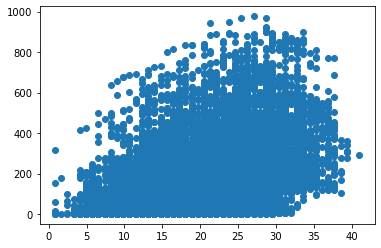

In [40]:
# L: Linear relationship
# somewhat linear
plt.scatter(X['temp'], y);

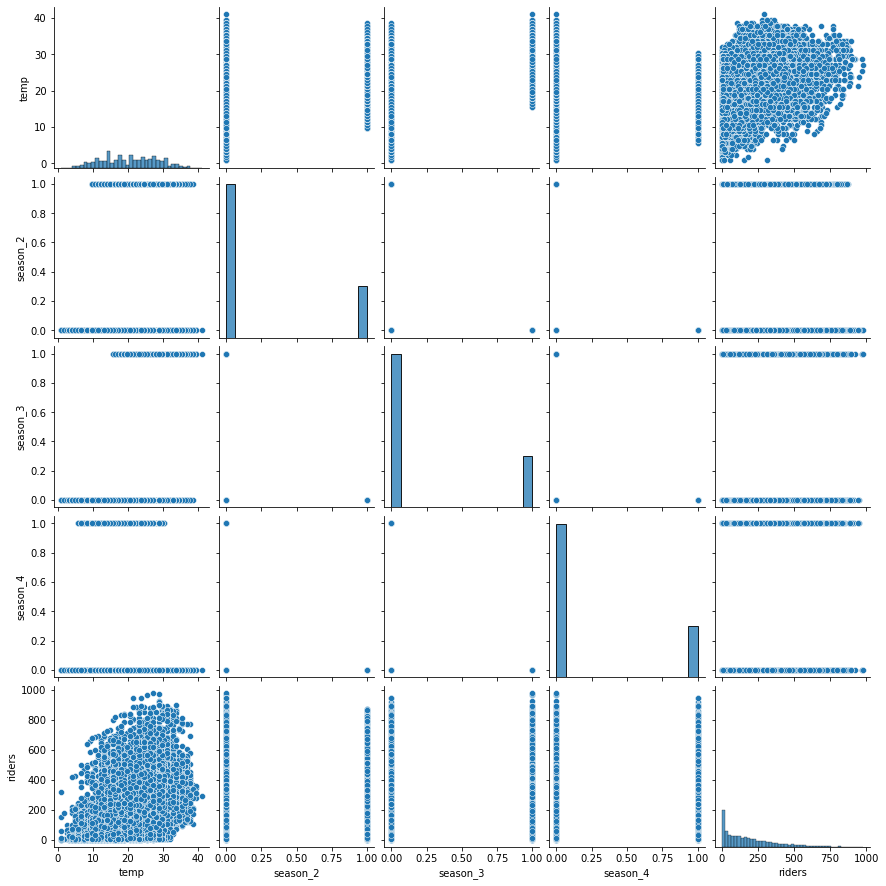

In [41]:
# some linear relationships
sns.pairplot(pd.merge(X, y, left_index = True, right_index = True));

In [42]:
# I: Independent errors
# assumed although this is probably violated since this is time-series data

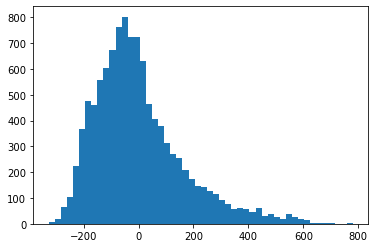

In [43]:
# N: Normally distributed errors
# assumed although there is some degree of right-skewness
resids = y - y_preds
plt.hist(resids, bins=50);

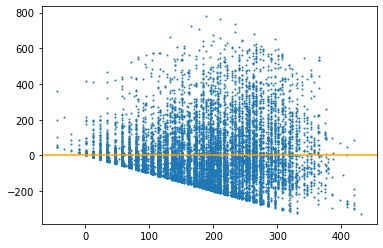

In [44]:
# E: Equal variance of errors (homoscedasticity)
# assumed although there are number of predictions where variances are much higher
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color="orange");

In [45]:
# M/I: No Multicollinearity/Independence of Predictors
# Temperature might share low/moderate correlation with season, but not strong enough (i.e. >0.7) to be overly worried
X.corr()

,temp,season_2,season_3,season_4
temp,1.000000,0.192603,0.635972,-0.266335
season_2,0.192603,1.000000,-0.335255,-0.335337
season_3,0.635972,-0.335255,1.000000,-0.335337
season_4,-0.266335,-0.335337,-0.335337,1.000000


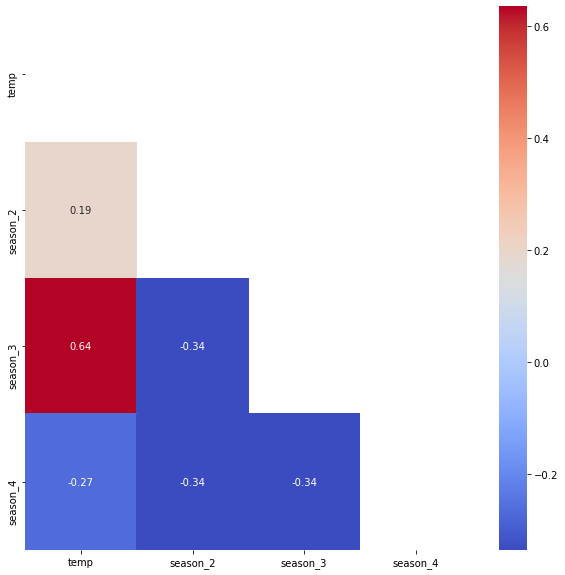

In [46]:
# np.zeros_like returns an array of zeros with the same shape and type as X-data
mask = np.zeros_like(X.corr())

# np.triu_indices_from(mask) --> returns the indices for the upper-triangle of corr matrix.
mask[np.triu_indices_from(mask)] = True

# mask parameter refers to data will not be shown in cells where mask is True. 
# in other words, the upper triangle of corr matrix will be automatically masked.
plt.figure(figsize=(10, 10))
sns.heatmap(
    X.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);

Yikes! We should probably not say anything very strong about the coefficients in our interpretation. 

## Additional Exercise

Let's start by making a "better model" i.e. a statistical model which is not a random guess.

Fit a model that uses _all_ x-variables (excluding `atemp`) as well as the **the hour of day**. One-hot encode columns accordingly.

In [47]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [48]:
# create a new variable to store the hour for each row of data
bike["hour"] = bike["datetime"].dt.hour

xvars = [
    "season", "holiday", "workingday",
    "weather", "temp", "humidity",
    "windspeed", "hour"
]

X = bike[xvars]
X = pd.get_dummies(columns=["season", "weather", "hour"], data=X, drop_first=True)

In [49]:
X.head()

,holiday,workingday,temp,humidity,windspeed,season_2,season_3,season_4,weather_2,weather_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,81,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# set the y-value
y = bike['riders']

In [51]:
model_big = LinearRegression()
model_big.fit(X, y)

LinearRegression()

In [52]:
# r-squared score
model_big.score(X, y)

0.6321452699700186

# Conclusions and Takeaways:
* Machine learning, aka statistical modeling, is an important area in Data Science and it comes in many varieties for different situations which we'll spend much of our course exploring.
* Linear regression is a **supervised "white-box" regression model**.
* As far as machine learning goes, OLS is very simple, yet still powerful.
* One of its more enticing feature is that its **coefficients are interpretable!**
* In the midst of all this, we learned how to handle dummy variables, something important for all of the models we'll learn about.